## DATA SCIENCE ASSIGNMENT 2 

I am gonna work with data from the Federal Wildfires Agencies that have been collecting data on land and costs in relation to wildfires. 
Dataset downloaded from Kaggle: https://www.kaggle.com/datasets/kkhandekar/total-wildfires-acres-affected-1983-2020

This is a very simple dataset containing the amount of fires in different years, how much area was affected, the total cost in aid and who funded it. 
Firstly, lets have a look at the data. 

In [ ]:
pip install scikit-learn

In [1]:
import random, os, sys, shutil
import sklearn
import warnings 
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from collections import Counter
import seaborn as sns
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
%matplotlib inline


In [2]:
#Show max 100 columns or rows
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
#Dont use scientific notation for numbers (e.g 1.003767687e-12)
pd.set_option('display.float_format','{:.2f}'.format)   
np.set_printoptions(suppress=True)

In [5]:
# load in data as a pandas dataframe 
df = pd.read_csv("/content/Wildfires.csv")
df.columns

Index(['Year', 'Fires', 'Acres', 'ForestService', 'DOIAgencies', 'Total'], dtype='object')

# LOOK AT THE DATA

In [8]:
df["Acres"].value_counts(normalize = True)


2,896,147    0.03
2,719,162    0.03
8,689,389    0.03
9,873,745    0.03
9,328,045    0.03
5,292,468    0.03
5,921,786    0.03
3,422,724    0.03
8,711,367    0.03
9,326,238    0.03
4,319,546    0.03
3,595,613    0.03
10,125,149   0.03
5,503,538    0.03
10,026,086   0.03
8,767,492    0.03
4,664,364    0.03
8,097,880    0.03
3,960,842    0.03
7,184,712    0.03
1,797,574    0.03
2,447,296    0.03
5,009,290    0.03
1,827,310    0.03
4,621,621    0.03
2,953,578    0.03
2,069,929    0.03
4,073,579    0.03
3,570,911    0.03
1,840,546    0.03
6,065,998    0.03
2,856,959    0.03
1,329,704    0.03
5,626,093    0.03
7,383,493    0.03
10,122,336   0.03
Name: Acres, dtype: float64

In [9]:
# check if any columns are missing values 
df.isna().any()

Year             False
Fires            False
Acres            False
ForestService    False
DOIAgencies      False
Total            False
dtype: bool

# DATA WRANGLING 

All the data in the dataset are of type, string, even though it contains mainly numbers. This means that I need to convert it to type, float, before I can use the pandas and scikit library. 

Before converting the types, I need to remove any special characters from the columns. 

In [10]:
# remove special characters by using .replace() method
df['Fires']=df.Fires.replace(',', '', regex=True)
df['Acres'] = df.Acres.replace(',','',regex=True)
df['Total'] = df.Total.replace(',','',regex=True)
df['Total'] = df.Total.str.replace('$','',regex=True)
df['ForestService'] = df.ForestService.str.replace(',','',regex=True)
df['ForestService'] = df.ForestService.str.replace('$','',regex=True)
df['DOIAgencies'] = df.DOIAgencies.replace(',','',regex=True)
df['DOIAgencies'] = df.DOIAgencies.str.replace('$','',regex=True)

# convert to float 
df['Fires'] = df['Fires'].astype(float)
df['Acres'] = df['Acres'].astype(float)
df['ForestService'] = df['ForestService'].astype(float)
df['Total'] = df['Total'].astype(float)
df['DOIAgencies'] = df['DOIAgencies'].astype(float)

In [11]:
# DISPLAY THE DATA WITH DIFFERENT FORMS OF DECIMALS WITHOUT CHANGING IT 
pd.options.display.float_format = '{:,.0f}'.format 
df.describe()

,Year,Fires,Acres,ForestService,DOIAgencies,Total
count,36,36,36,36,36,36
mean,"2,002","73,119","5,445,070","865,816,639","267,363,139","1,133,179,778"
std,11,"12,723","2,841,680","636,855,541","149,919,541","777,180,717"
min,"1,985","47,579","1,329,704","111,625,000","56,436,000","202,778,000"
25%,"1,994","66,012","2,939,220","325,454,000","135,720,500","462,020,500"
50%,"2,002","72,360","4,836,827","714,055,500","275,409,000","936,612,500"
75%,"2,011","82,323","8,245,757","1,216,716,250","396,079,750","1,633,618,750"
max,"2,020","96,385","10,125,149","2,615,256,000","528,000,000","3,143,256,000"


# SUMMARIZE DATA 
Summarise them (means, ranges, distributions?)

Lets look at some of the basic features of the data. 

In [18]:
pd.options.display.float_format = '{:,.0f}'.format 
# getting the central tendencies 
total_mean = np.mean(df['Total'])
total_median = np.median(df['Total'])
total_mode = Counter(df['Total']).most_common(1)[0][0]
print('The mean of the total cost is: ',total_mean)
print('The median of the total cost is: ',total_median)
print('The mode of the total cost is: ',total_mode,'\n')
# median = 1133179777.77777
# mean = 1133179777.7777777
# median = 936612500.0
#total_mode = 239943000.0

acres_mean = np.mean(df['Acres'])
acres_median = np.median(df['Acres'])
acres_mode = Counter(df['Acres']).most_common(1)[0][0]
print('The mean of acres burned is: ',acres_mean)
print('The median of acres burned is: ',acres_median)
print('The mode of acres burned is: ',acres_mode)
# acres_average = 5445069.722222222
# acres_median = 4836827.0
# acres_mean = 5445069.722222222
# acres_mode = 2896147.0

fires_mode=Counter(df['Fires']).most_common(1)[0][0]


The mean of the total cost is:  1133179777.7777777
The median of the total cost is:  936612500.0
The mode of the total cost is:  239943000.0 

The mean of acres burned is:  5445069.722222222
The median of acres burned is:  4836827.0
The mode of acres burned is:  2896147.0


I have checked the mean, median, average and mode of the two variables that I want I am interested in, in terms of a linear regression. 
The mean and median of the total cost used for restoration is more of less the same, which is interesting as the mean is calculated by adding all datapoints togehter and dividing by the number of data points, while the median is the number in the middle and the mode is the most frequent number. 

This indicates that the total cost is quite evenly distributed across the whole dataset, while the mode is so much smaller that there must be a group - a year eg or something where the cost of restoration was way lower than the rest. 

The same applies to the central tendencies, where the mean and the median has quite similar values, while the mode is way smaller. 

# DISCRETE AND CONTINOUES PROBABILITIES 
The cost and the acres is a continoues probalitity as it's datapoints lies within a range of infinite uncountable numbers. 

I am gonna try to fit the best probability density function, PDF to the dependent variable, 'Total' and the independent variable, 'Acres'. 

Most code from this section of the notebook is taken from Intro to DataScience github 'Week-5-Continuous-Probabilities.ipynb' 

In [19]:
# set up plot
plot=plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('ggplot')

Text(0, 0.5, 'Density')

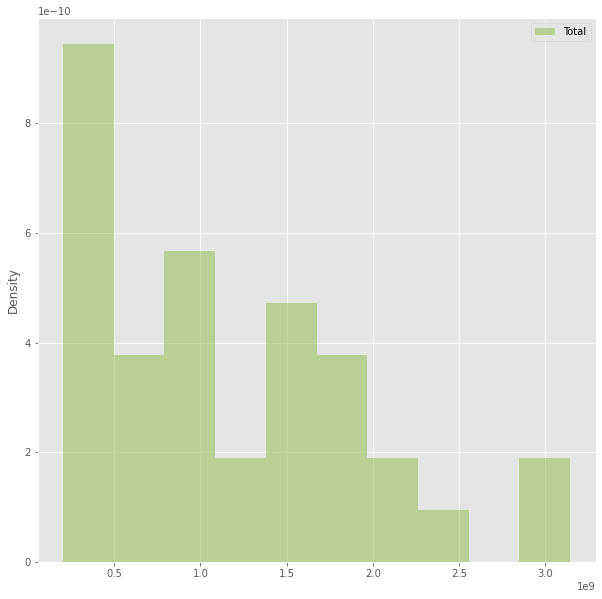

In [20]:
# plot the density distribution 
plt.figure(figsize=(plot))
ax = df['Total'].plot(kind='hist', bins=10, density=True, alpha=0.5, color=list(plt.rcParams['axes.prop_cycle'])[5]['color'], legend=True)
ax.set_ylabel('Density')

In [21]:
# function returns a probability density function, PDF
def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

Text(0, 0.5, 'Density')

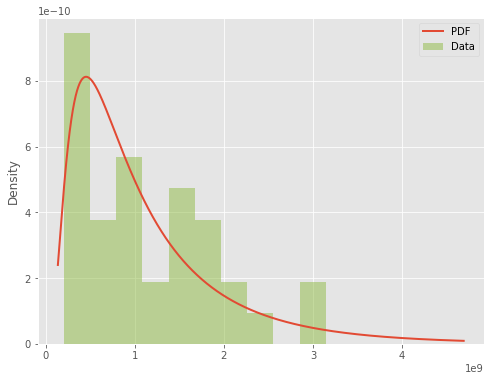

In [22]:
# plot the gaussian distribution 
dist_f = st.norminvgauss         # set the distribution
params = dist_f.fit(df['Total'])
pdf = make_pdf(dist_f, params)      # make the PDF model on the gaussian distribution and the acres column

plt.figure(figsize=(8,6))
ax = pdf.plot(lw=2, label='PDF', legend=True)
df['Total'].plot(kind='hist', bins=10, density=True, alpha=0.5,color=list(plt.rcParams['axes.prop_cycle'])[5]['color'] ,label='Data', legend=True, ax=ax)
ax.set_ylabel('Density')

So the model's curve is pretty much following the columns in the plot, but doesn't seems like it is covering all the data completely, as the columns also fluctuate a bit. 

It also gives us negative x-values which is odd, as a negative amount of area doesn't burn.

So there must exist a function that describes the data better. 
I am going to use a function that fits all the available density functions to the model and then chooses the one that fits the data best. 

In [23]:
def best_fit_distribution(data, dist_names, bins=200, ax=None, legend=True):
    """Model data by finding best fit distribution to data"""
    #Code adapted from: https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in dist_names if not d in ['levy_stable', 'studentized_range']]):
        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, legend=legend, label=distribution.name)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    return sorted(best_distributions, key=lambda x:x[2])

In [24]:
# plot all the fittings 
def compare_and_plot_distributions(data, dist_names, legend=True):
    # Plot for comparison
    plt.figure(figsize=(8,6))
    ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(plt.rcParams['axes.prop_cycle'])[5]['color'], legend=legend)
    ax.set_ylabel('Density')

    # Save plot limits
    dataYLim = ax.get_ylim()

    # Find best fit distribution
    best_distibutions = best_fit_distribution(data, dist_names, 200, ax, legend)
    best_dist = best_distibutions[0]

    # Update plots
    ax.set_ylim(dataYLim)

    # Make PDF with best params 
    pdf = make_pdf(best_dist[0], best_dist[1])

    # Display       
    plt.figure(figsize=(10,5))
    plt.legend(loc='upper right')
    ax = pdf.plot(lw=2, label='PDF', legend=legend)
    ax.set_ylabel('Density')
    data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(plt.rcParams['axes.prop_cycle'])[5]['color'],label='Data', legend=legend, ax=ax)

    param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
    dist_str = '{}({})'.format(best_dist[0].name, param_str)

    ax.set_title('Best fit distribution \n' + dist_str)
    ax.set_ylabel('Density')

In [25]:
# get all available scipy distributions
dist_names = _distn_names

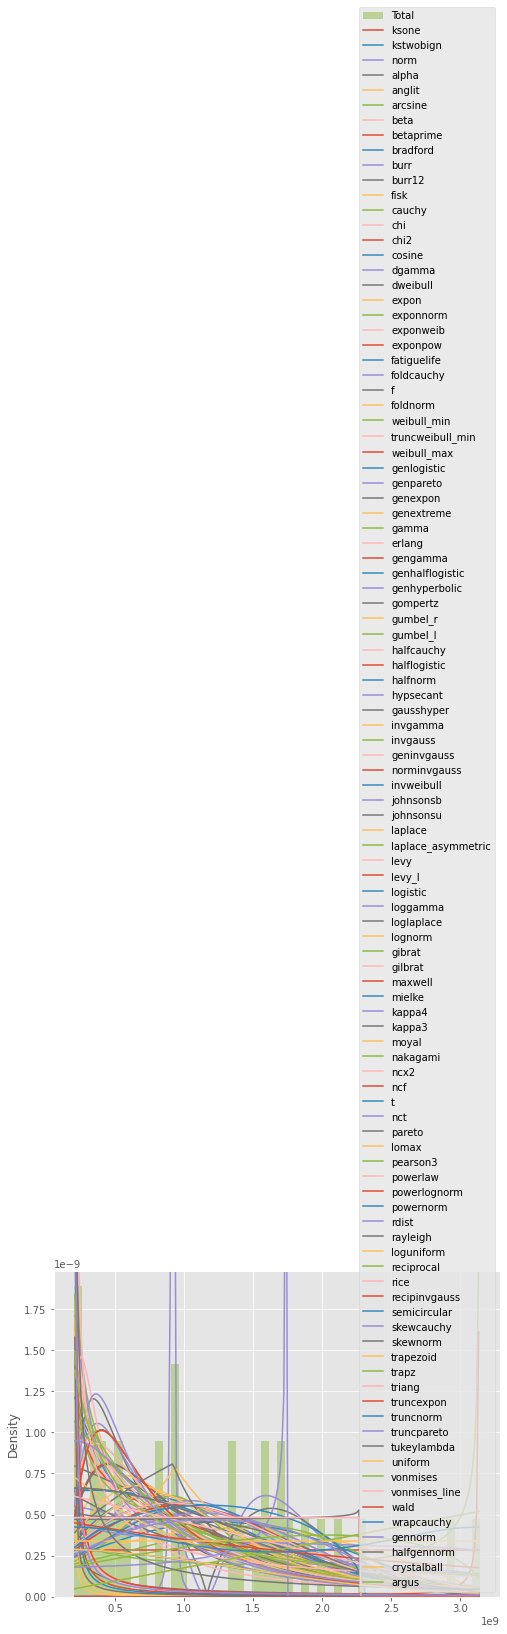

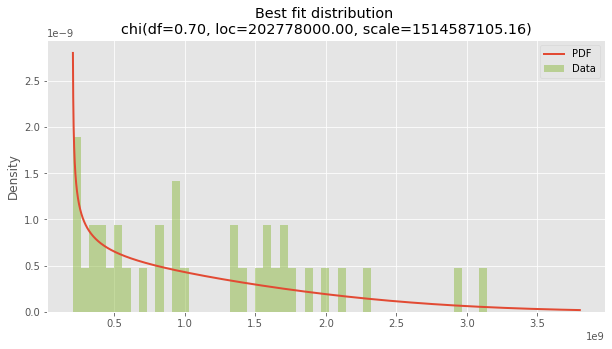

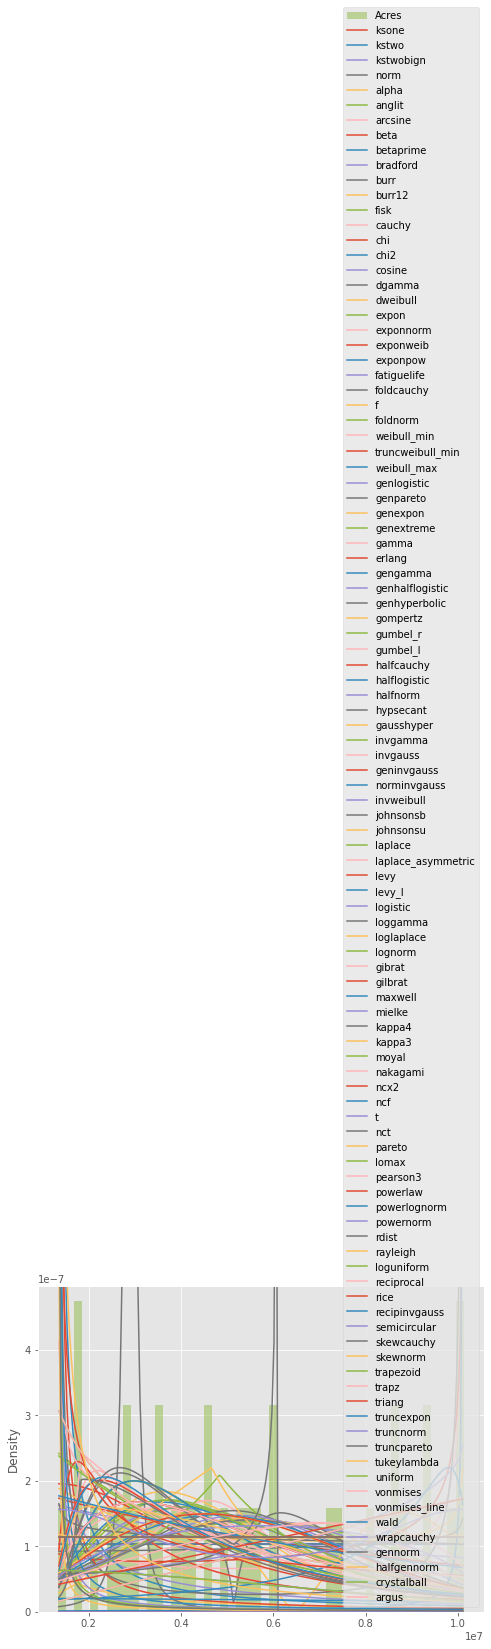

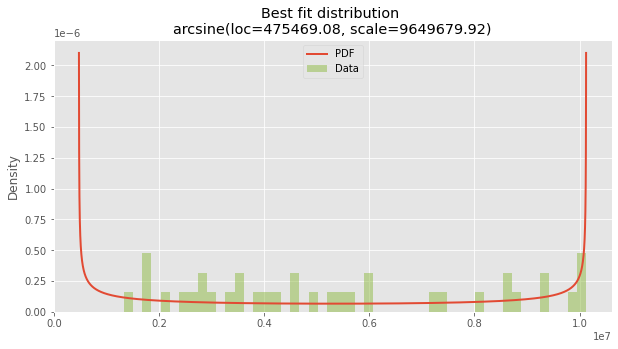

In [26]:
compare_and_plot_distributions(df['Total'], dist_names)
compare_and_plot_distributions(df['Acres'],dist_names)

So the functions shows us that the chi distribution is the most fitting for our dependent variable, 'Total'. 

It has the following features: df=0.70, loc=20277788.00,scale=1514587105.16 

showing us that it is very close to being the halfnorm distribution.

While the arcsine distribution is best for the independent variable, 'Acres' even though it shows fitting below the lowest number of data on the x-axis. This model makes sense as the data is quite evenly distributed on the y-axis with extremes values towards the ends. 


# LINEAR CORRELATION BETWEEN VARIABLES 

I want to look at more than one variable to see if there is a correlation. 
I am gonna look at the cost of restoration after a fire and the amount of burned area, and if there is a possible linear correlation between these two. This correlation can be described via a monotonically increasing function: f(x) = mx + c 


My hypothesis is that the total cost of aid, f(x) will show a positive linear correlation with the size of the area burned, x. 


The expected function in this case would look like: f(x) = mx 

as I am expecting c to equal 0 as there should be no costs if no acres has burned. 


First I am using the pandas correlation method .corr() to predict the chances of a negative or positive correlation between any two variables.

Most of the code for fitting a linear model is taken from the Intro to DataScience course from the 'Week-4-Regression.ipynb' notebook. 

In [27]:
# prediction of correlation 
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-27-96e3be592327>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Year,Fires,Acres,ForestService,DOIAgencies,Total
Year,1.00,-0.35,0.64,0.84,0.87,0.86
Fires,-0.35,1.00,0.04,-0.27,-0.27,-0.27
Acres,0.64,0.04,1.00,0.73,0.80,0.75
ForestService,0.84,-0.27,0.73,1.00,0.92,1.00
DOIAgencies,0.87,-0.27,0.80,0.92,1.00,0.95
Total,0.86,-0.27,0.75,1.00,0.95,1.00


This table shows a few interesting things. 
Firstly, my thesis that there would be a positive correlation between acres burned and total costs seems to be true, and furthermore the chances are quite good. 

Another intriguging thing is that the negative values in the fires cell are indicating that the number of fires is negatively correlated to the other parameters. This feels immediate contradictory as less fires should mean that if the number of fires increases the total cost would decrease. This must indicate that the cost of each fire is very varied meaning that some of the fires are responsible for most of the total costs. 

I am gonna look into this in a bit, but first I am going to follow-up on the variables, acres and total cost, to see if the predictions are actually true. 

204.82254 17906770.748111725


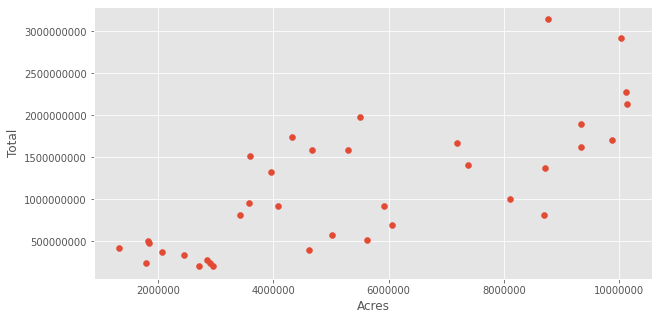

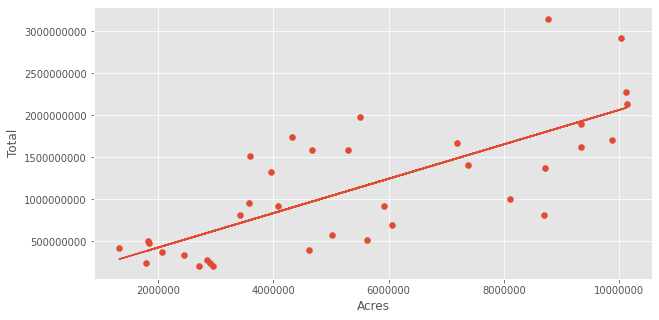

In [32]:
# PLOTTING THE VARIABLES 
data = df[["Acres","Total"]].values
x = data[:,0]    
y = data[:,1]   
pd.set_option('display.float_format','{:.2f}'.format)   
np.set_printoptions(suppress=True)

def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (10,5))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    return ax

ax = plot_scatter(x,y,"Acres","Total")

# FITTING THE LINEAR MODEL 
slope, intercept, r, p, std_err = st.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]            # this is our function

ax = plot_scatter(x,y,"Acres","Total")
ax.plot(x, model_y)
print(slope,intercept)


This seems like an alright fitting to the model. The function for the linear correlation between the two variables is: f(x) = 204.82x + 17906770.75 

In contrast to my assumptions, the function has a c-value which suggests that there is money spent even though no acres has been burned, also the line actually doesn't intercept with the y-axis, which both indicate that there we are getting an error in our linear regression function.  

To check the reliability of our linear model, I am gonna calculate the Pearson's r coefficient along with the p value. They indicate respectively which correlation that exists between two variables and the strength of it and the probability of the data happening under the null hypothesis, meaning the changes of the data being in no correlation with each other. 

In [ ]:
# check the Pearson's r coeffient 
#Correlate
from scipy import stats
r, p = stats.pearsonr(x,y)
r,p

# r value and p value 

(0.7489121472318598, 1.491642880263612e-07)

The r value for the variables, total costs and acres burned is 0,75 which confirms the hypothesis about a positive correlation. The value is also quite far from 0, which indicates no correlation as well as this linear model being a fine model to describe this relationship. 

The p value is 1,49e-07 which is really small and which indicates the changes of this happening under the null hypothesis, which in this case would be no correlation between the variables. In this case, the p value is very small, thus we reject the null hypothesis - that there is no correlation between the variables and conclude that the relationship between the two variables, total cost and burned acres can be described with a linear function, f(x) = mx + c 

which in this case has the specific model: f(x) = 204.82x + 17906770.75 


# Plotting multiple variables 

I am interested in if the same positive linear correlation can be proved between independent variable, number of fires and dependent variable, total cost. Initially, you would think that would be the case based on the same argument as before: That the more fires, the more money and resources would go into restoration, but our prediction from before suggests otherwise. 
I am gonna plot the total cost as a function of number of fires. f(fires) = m*fires 

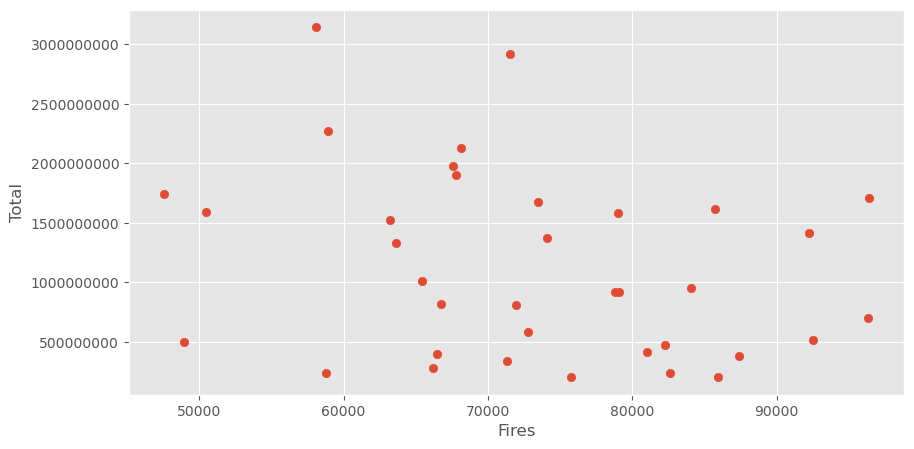

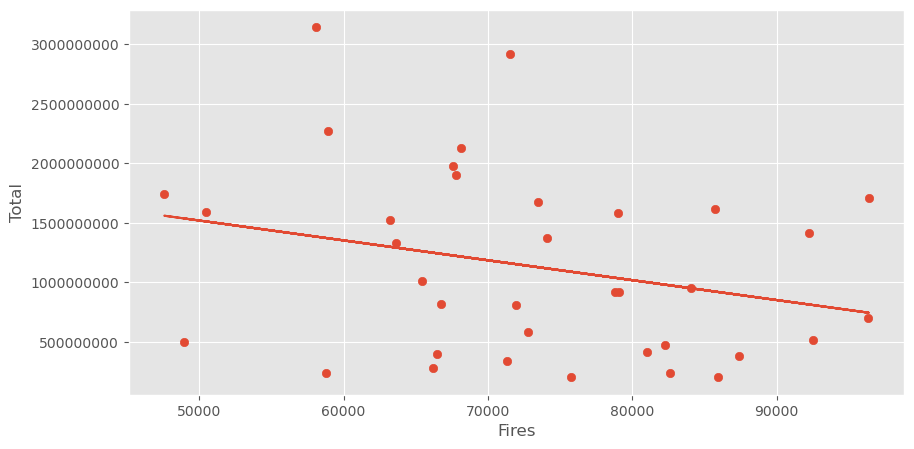

In [ ]:
# PLOT THE VARIABLES 
data = df[["Fires","Total"]].values
x = data[:,0]      
y = data[:,1]

def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (10,5))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    return ax

ax = plot_scatter(x,y,"Fires","Total")

# FITTING THE MODEL
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]              # our function

ax = plot_scatter(x,y,"Fires","Total")
ax.plot(x, model_y)


As we can see, there doesn't seem to be any correlation between the two variables, fires and total. 

This suggests that the amount of cost pr fires can be very different. 

Therefore, I am gonna try to fit another model - the polynomial model to a varied number of n's to see if that is a better model to fit the data. 

           2
1.534e-06 x + 186.7 x + 5.919e+07


r2 = 0.5610293529471273


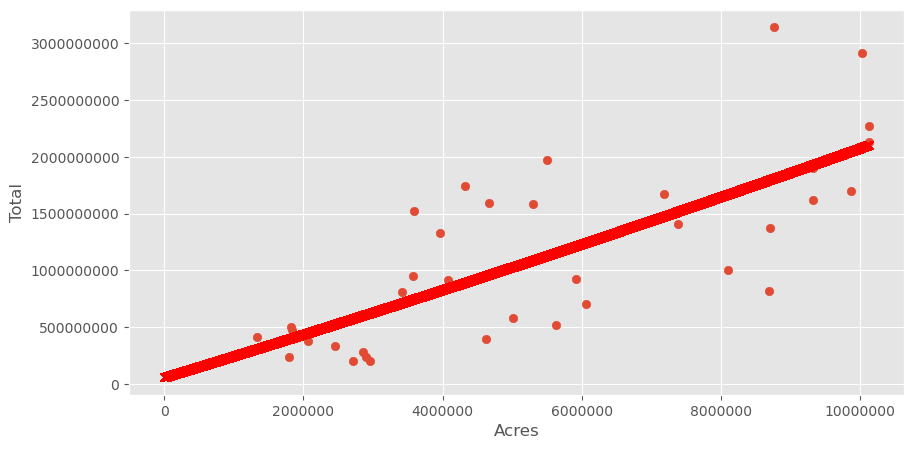

In [ ]:
# kind of polynomial model 
num_degrees = 2   # the number of polynomiet

#Fit model
poly_model = np.polyfit(x, y, num_degrees)
poly_model = np.poly1d(poly_model)

#Get r2 score
r2 = r2_score(y, poly_model(x))

#Plot
ax = plot_scatter(x,y,"Acres","Total")
model_x = np.arange(np.max(x))
model_y = poly_model(model_x)
ax.plot(model_x,model_y,"rx")

print(poly_model)           # print the function for the mode 
print("\n")
print("r2 =",r2)

# MULTIPLE REGRESSION MODELS 

In a polynomial model, there is two intersections of the plot with the x-axis, which we are not getting here at all.  

Instead I will try to incorporate the fires variable into the linear regression model to get a clearer view of the connection between the variables. 

This will be a multiple regression model, with two independent variables, acres and fires. 

The formula for a multiple linear regression is: y = m1x1 + m2x2 + c 

Here c is again the interception of the y-axis and m1 and m2 is the slope of the independent variables, x1 and x2

In [33]:
x = df[['Acres', 'Fires']]
y = df['Total']

regr = linear_model.LinearRegression()
regr.fit(x, y) 
print(regr.coef_, regr.intercept_,regr.score(x, y)) 

#ax = plot_scatter(x,y,"Acres (x 100,000)","Total")
#ax.plot(x, model_y)

[   207.78006231 -18371.47583244] 1345101179.4916182 0.6512090276030348



So the relationship between the independent variables, acres and fires, and the dependent variable, total cost can be described as: 

f(x) =  207.78x1 + 18371.48x2 + 1345101179.4916172 

m1 = 207.78006231

m2 = -18371.47583244

c = 1345101179.4916172

In [ ]:
# calculate the total cost ! 
regr.predict()   # take two values for x -> acres and fires    

# What ethical issues may arise from using these models to make predictions?
#### What extra data (more variables, better variables) would improve your current models, or allow you to make better, different models?

This dataset is as mentioned a very simple one. Most of the information is based on numbers of cost and areas, which while it is definitely situated in a very concrete context, it is not directly sensitive data about individuals whereabouts, situation or histories.  
I see this data as a great resource for tracking fires and the scope of these, that could potentially lead to discrovering patterns in the fires. This could be patterns of frequency, size and cost, that could tell something about if these fires a put out quickly, spread quickly or how well the restoration process goes.  

Making predictions on the cost and resources needed for wildfires could possibly lead to better budgetting before the event and be used to spread awareness of the costs of wildfires, which could further lead to acts of prevention. 

It could also - if the figures are deemd too high be something that would make people want to spend less money on restoring, which could be potentially harmful if that is the conclusion. 


#### Extra Data
So while this dataset doesn't necessarily directly cause any harm, it might be potentially harmful in a case, where one would approach these numbers as the full picture, which it is definitely not. 
The columns that has not been used in the data analysis mainly breaks down the total cost into sources of funding not adding much more information to the case. This suggests that the only thing we should care about when dealing with wildfires is the cost of restoration and nothing else. The data doesn't tell us anything about where the fires is happening, how often, how quickly they spread or the people, properties and the wild life harmed during. This information could be vital in both the preventive initiatives and knowing the full scope of the damage. 

So this dataset is not directly harmful, but it is also not totally ethical to use as the only source to get a full picture of wildfires in the US. 

Also the amount of data in this dataset is not quite a lot. 
If there was more data per parameter the error might have been smaller in the linear regression model. 